In [16]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame
import json
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick


In [17]:
low_memory=False
file_to_load = "world_mask_mandates.csv"
# Read Purchasing File and store into Pandas data frame
data_raw= pd.read_csv(file_to_load)
data_raw["ConfirmedCases"] = data_raw["ConfirmedCases"].replace(np.nan, 0)
# data_raw.head()

In [18]:
# data_raw.columns

In [19]:
data_reduced= data_raw[['CountryName','Jurisdiction','Date','H6_combined_numeric','H6_combined','ConfirmedCases','ConfirmedDeaths']]
data_reduced.head(5)

,CountryName,Jurisdiction,Date,H6_combined_numeric,H6_combined,ConfirmedCases,ConfirmedDeaths
0,Aruba,NAT_TOTAL,20200101,0.0,0,0.0,NaN
1,Aruba,NAT_TOTAL,20200102,0.0,0,0.0,NaN
2,Aruba,NAT_TOTAL,20200103,0.0,0,0.0,NaN
3,Aruba,NAT_TOTAL,20200104,0.0,0,0.0,NaN
4,Aruba,NAT_TOTAL,20200105,0.0,0,0.0,NaN


In [20]:
# data_reduced.dtypes

In [21]:
data_reduced.insert(5, 'daily_cases','')
data_reduced.head()

,CountryName,Jurisdiction,Date,H6_combined_numeric,H6_combined,daily_cases,ConfirmedCases,ConfirmedDeaths
0,Aruba,NAT_TOTAL,20200101,0.0,0,,0.0,NaN
1,Aruba,NAT_TOTAL,20200102,0.0,0,,0.0,NaN
2,Aruba,NAT_TOTAL,20200103,0.0,0,,0.0,NaN
3,Aruba,NAT_TOTAL,20200104,0.0,0,,0.0,NaN
4,Aruba,NAT_TOTAL,20200105,0.0,0,,0.0,NaN


In [22]:
# Formating Date column.
data_reduced['Date'] = pd.to_datetime(data_reduced['Date'],format ='%Y%m%d')

In [23]:
# truncking the date range
A = '2020-01-01'
B = '2021-12-31'
data_truncated = data_reduced.loc[(data_reduced['Date'] >= A) & (data_reduced['Date'] <= B)]
# data_truncated.head(5)

In [24]:
data_six = data_truncated.loc[data_truncated['CountryName'].isin(['United States','Canada','Germany','India',
                                                                       'Japan','Sweden']) & data_truncated['Jurisdiction'].isin(['NAT_TOTAL']) ]
data_six['CountryName']

52716            Canada
52717            Canada
52718            Canada
52719            Canada
52720            Canada
              ...      
192490    United States
192491    United States
192492    United States
192493    United States
192494    United States
Name: CountryName, Length: 4386, dtype: object

# United States

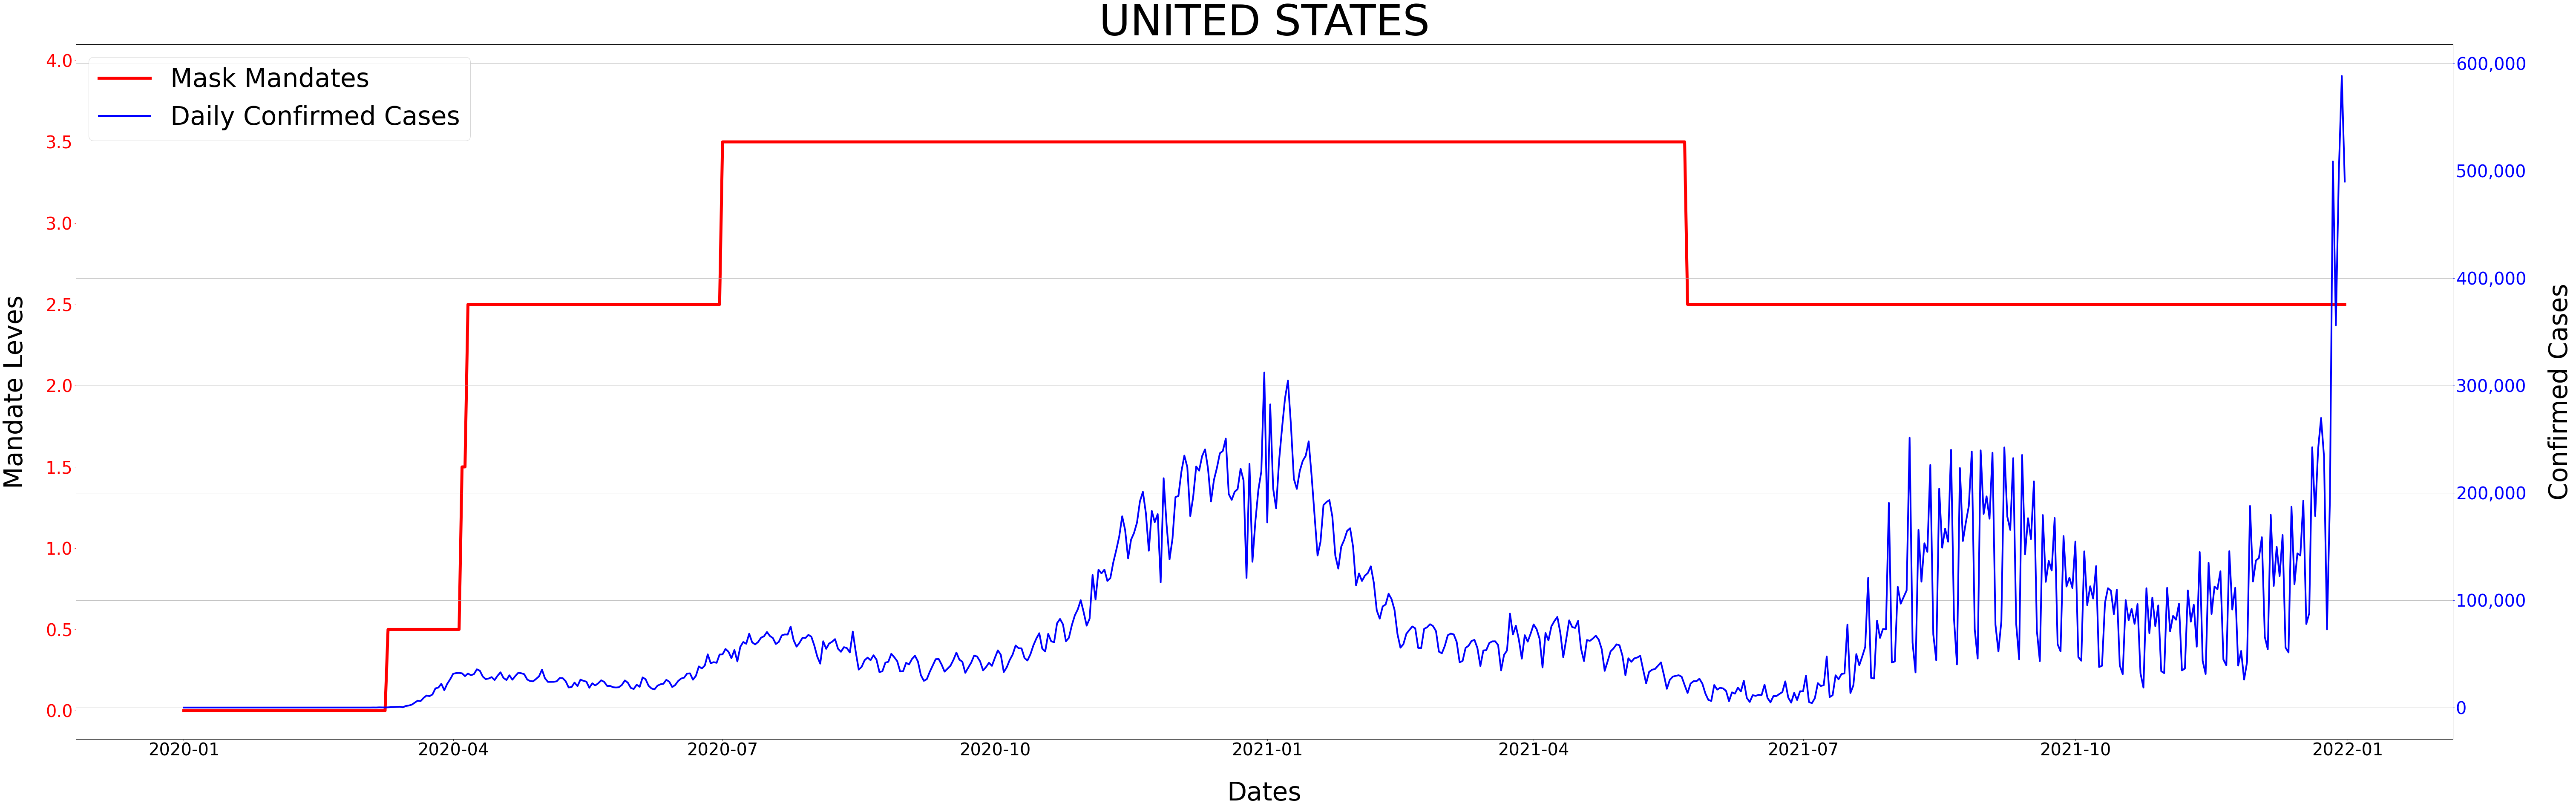

In [25]:
usa_df = data_six.loc[data_six['CountryName'].isin(['United States'])]
usa_df['daily_cases'] =usa_df['ConfirmedCases'].diff()
usa_df['daily_cases'] =usa_df['daily_cases'].fillna(0)

x1_usa = usa_df[['H6_combined_numeric']]
x2_usa = usa_df[['daily_cases']]
dates_usa = usa_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_usa,x1_usa,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('UNITED STATES',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)
ax2 =ax.twinx()
ax2.plot(dates_usa,x2_usa,linewidth=4,color="b",label='Daily Confirmed Cases')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)
plt.savefig("United States.png")

# CANADA

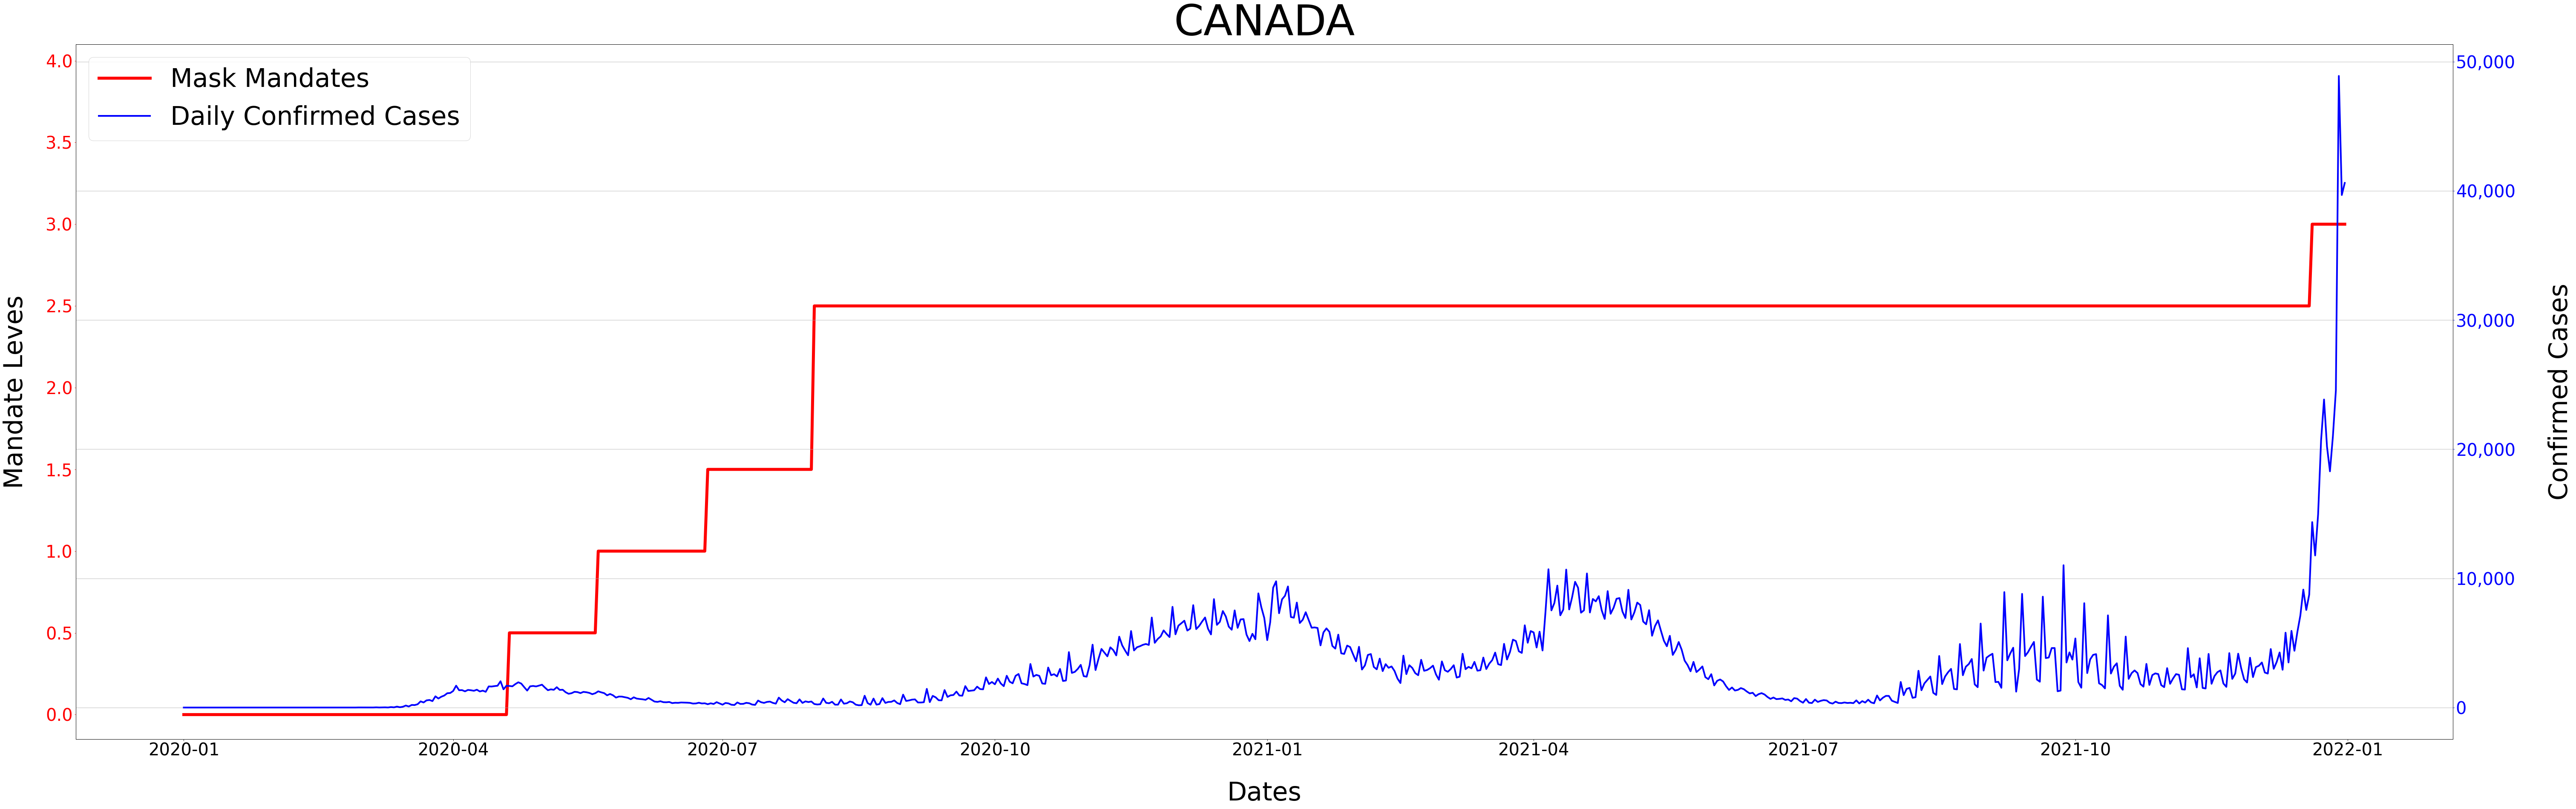

In [26]:
can_df = data_six.loc[data_six['CountryName'].isin(['Canada'])]
can_df['daily_cases'] =can_df['ConfirmedCases'].diff()
can_df['daily_cases'] =can_df['daily_cases'].fillna(0)

x1_can = can_df[['H6_combined_numeric']]
x2_can = can_df[['daily_cases']]
dates_can = can_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_can,x1_can,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('CANADA',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)
ax2 =ax.twinx()
ax2.plot(dates_can,x2_can,linewidth=4,color="b",label='Daily Confirmed Cases')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)
plt.savefig("Canada.png")

# GERMANY

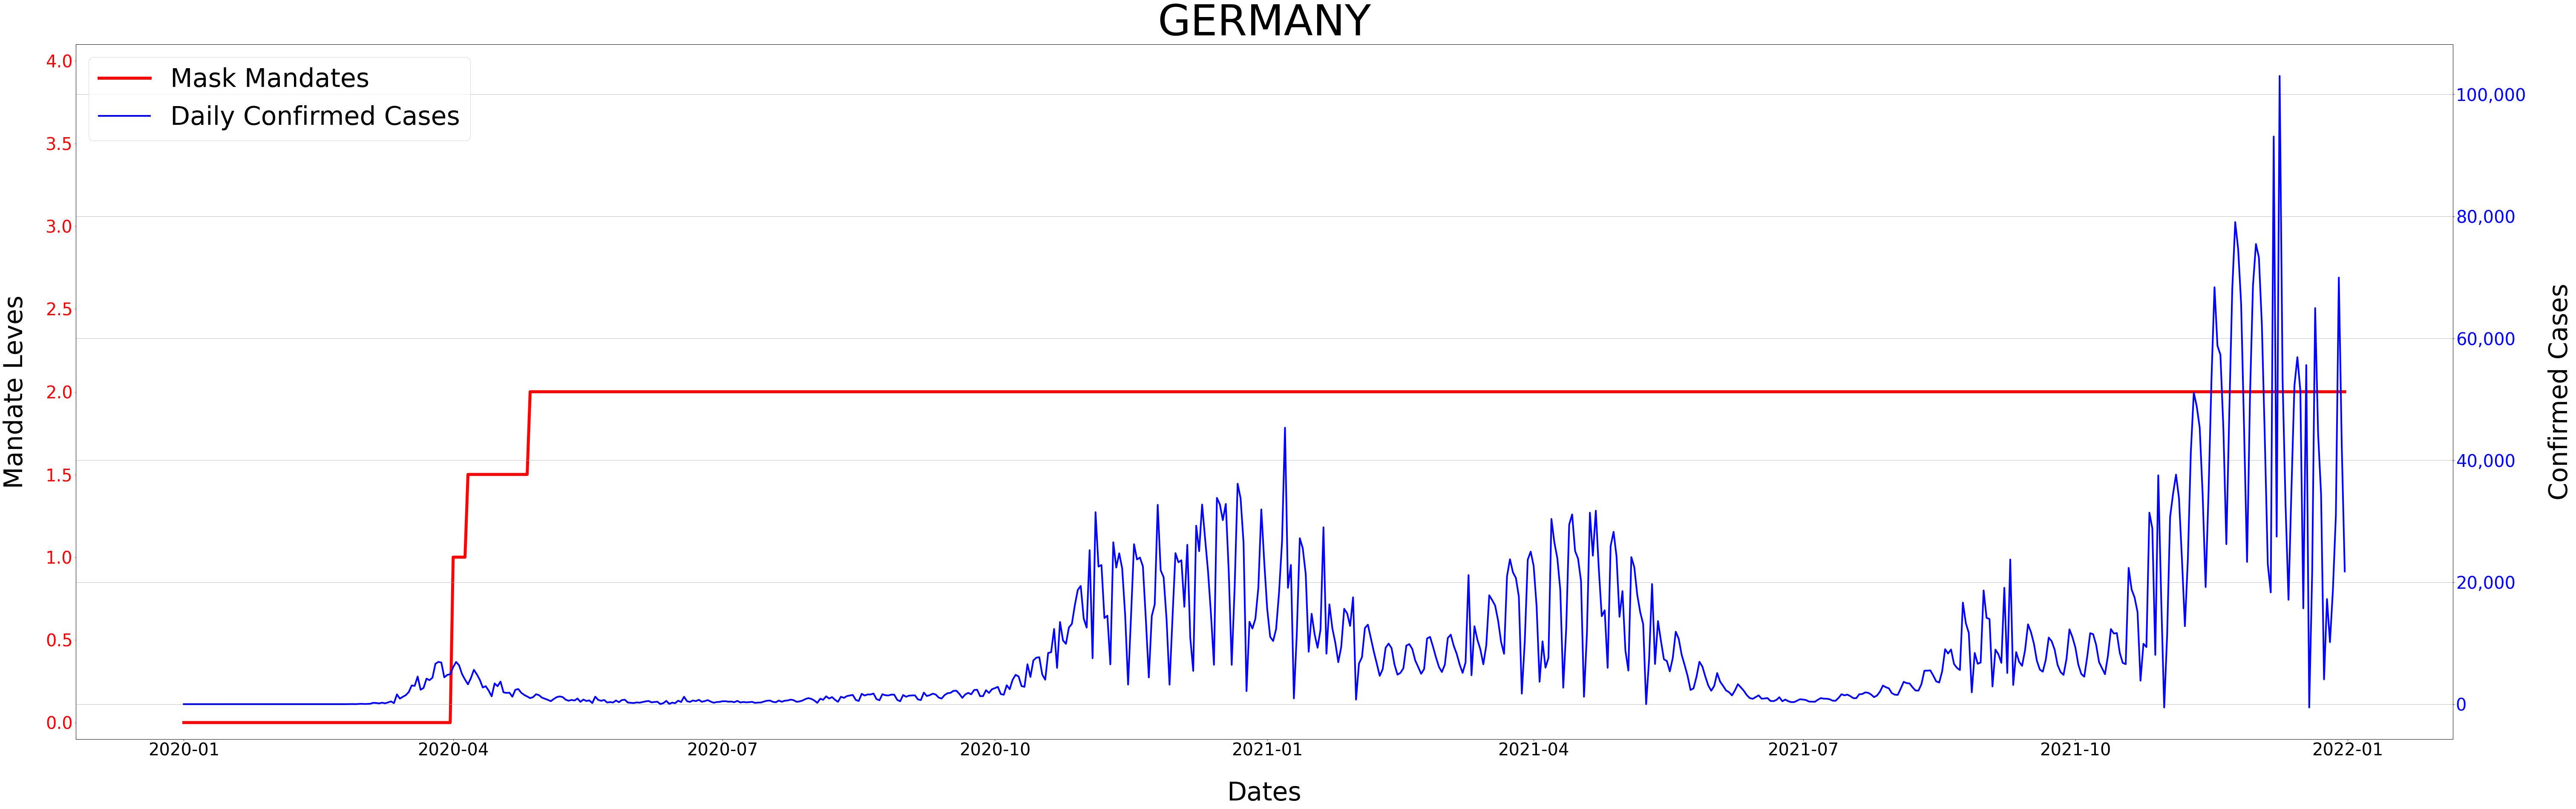

In [27]:
ger_df = data_six.loc[data_six['CountryName'].isin(['Germany'])]
ger_df['daily_cases'] =ger_df['ConfirmedCases'].diff()
ger_df['daily_cases'] =ger_df['daily_cases'].fillna(0)

x1_ger = ger_df[['H6_combined_numeric']]
x2_ger = ger_df[['daily_cases']]
dates_ger = ger_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_ger,x1_ger,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('GERMANY',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)
ax2 =ax.twinx()
ax2.plot(dates_ger,x2_ger,linewidth=4,color="b",label='Daily Confirmed Cases')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)
plt.savefig("Germany.png")

# JAPAN

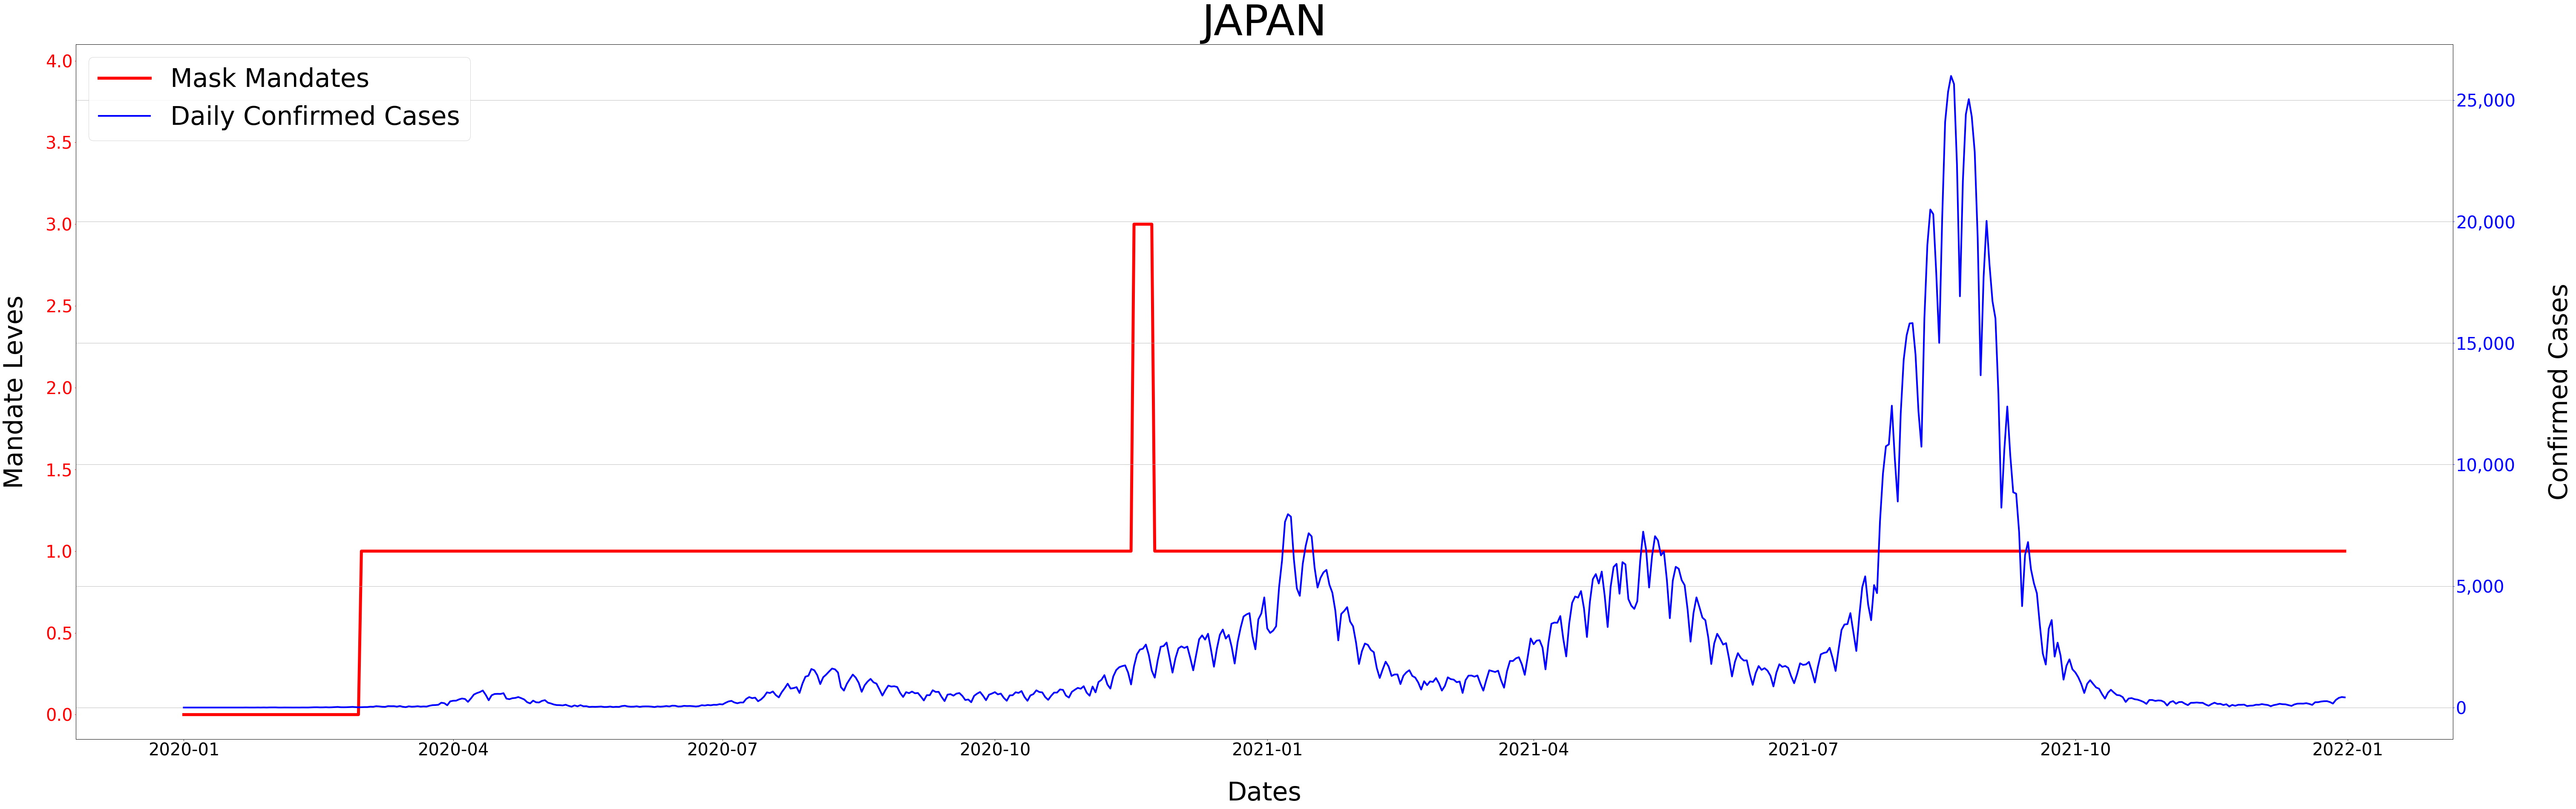

In [28]:
jap_df = data_six.loc[data_six['CountryName'].isin(['Japan'])]
jap_df['daily_cases'] =jap_df['ConfirmedCases'].diff()
jap_df['daily_cases'] =jap_df['daily_cases'].fillna(0)

x1_jap = jap_df[['H6_combined_numeric']]
x2_jap = jap_df[['daily_cases']]
dates_jap = jap_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_jap,x1_jap,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('JAPAN',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)


ax2 =ax.twinx()
ax2.plot(dates_jap,x2_jap,linewidth=4,color="b",label='Daily Confirmed Cases')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',fontsize=60)
ax2.grid(True)
plt.savefig("Japan.png")

# INDIA

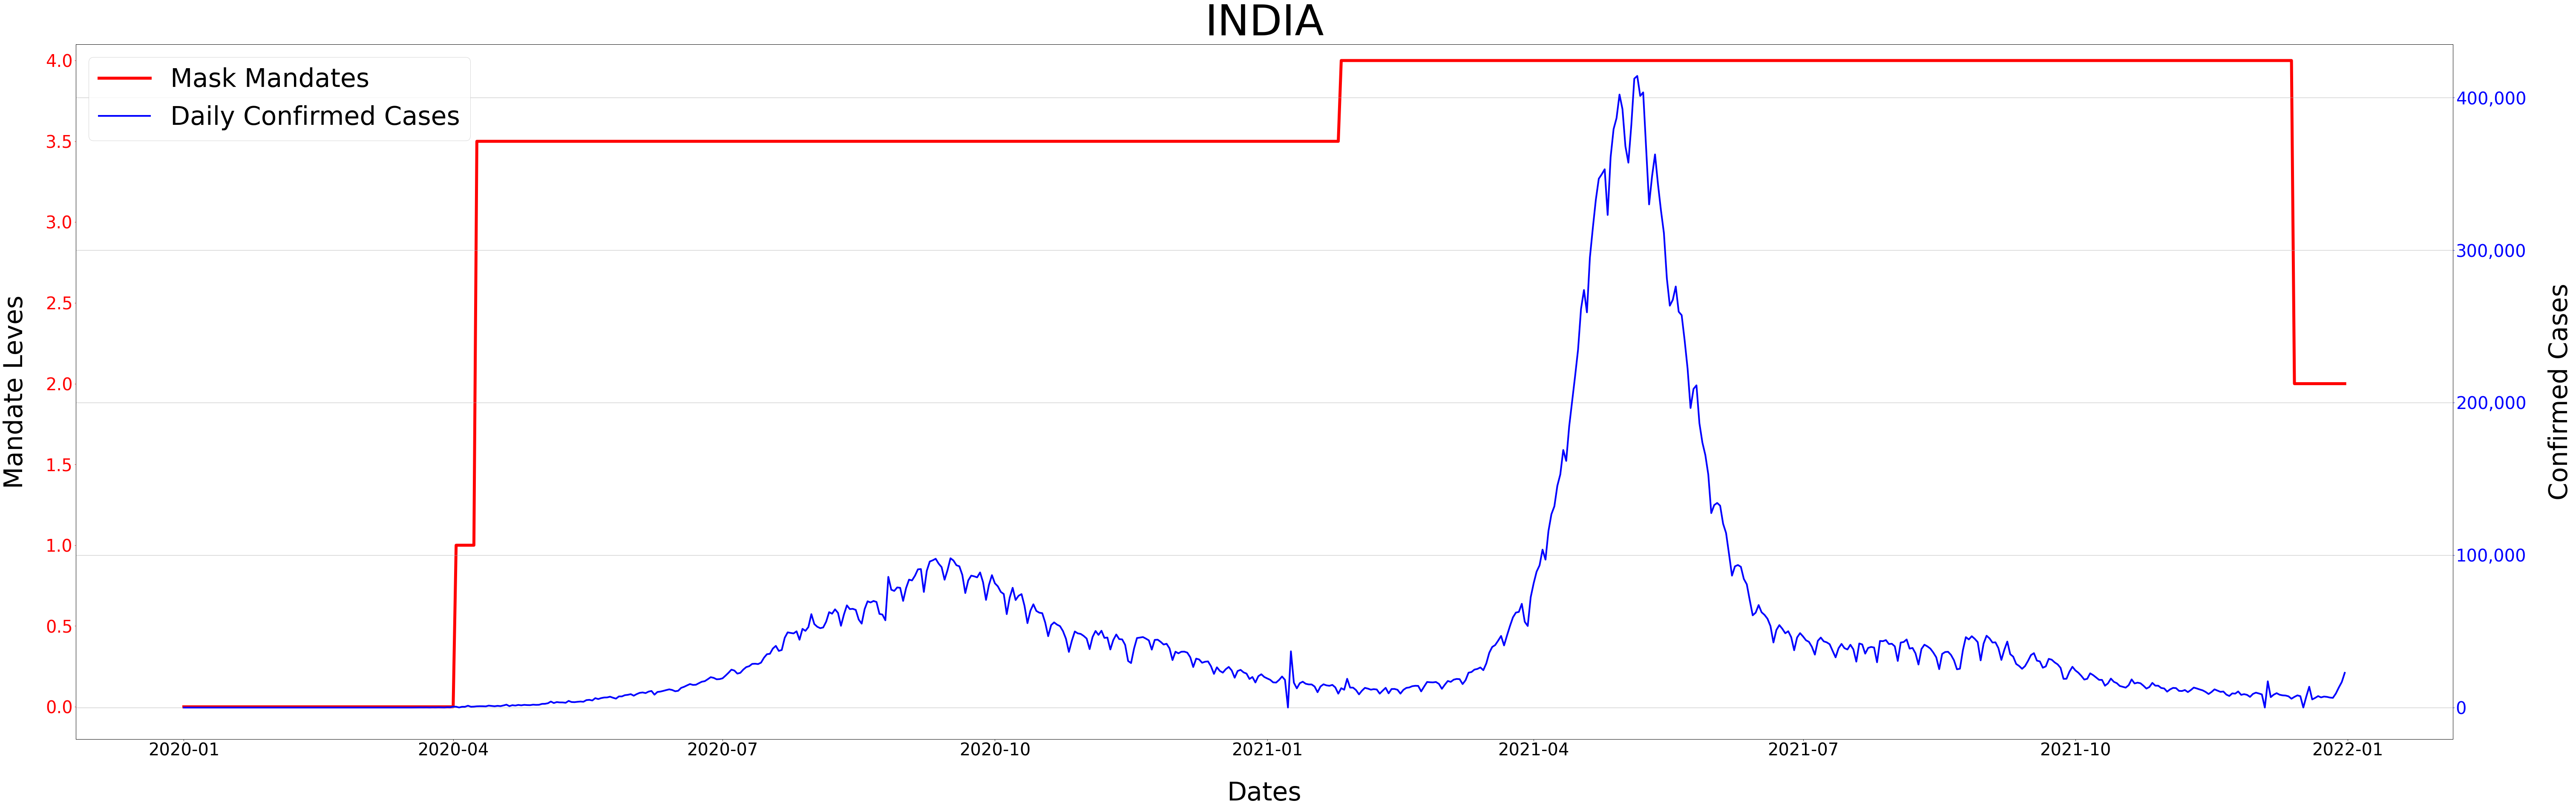

In [29]:
ind_df = data_six.loc[data_six['CountryName'].isin(['India'])]
ind_df['daily_cases'] =ind_df['ConfirmedCases'].diff()
ind_df['daily_cases'] =ind_df['daily_cases'].fillna(0)

x1_ind = ind_df[['H6_combined_numeric']]
x2_ind = ind_df[['daily_cases']]
dates_ind = ind_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_ind,x1_ind,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('INDIA',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)

ax2 =ax.twinx()
ax2.plot(dates_ind,x2_ind,linewidth=4,color="b",label='Daily Confirmed Cases')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',fontsize=60)
ax2.grid(True)
plt.savefig("India.png")

# SWEDEN

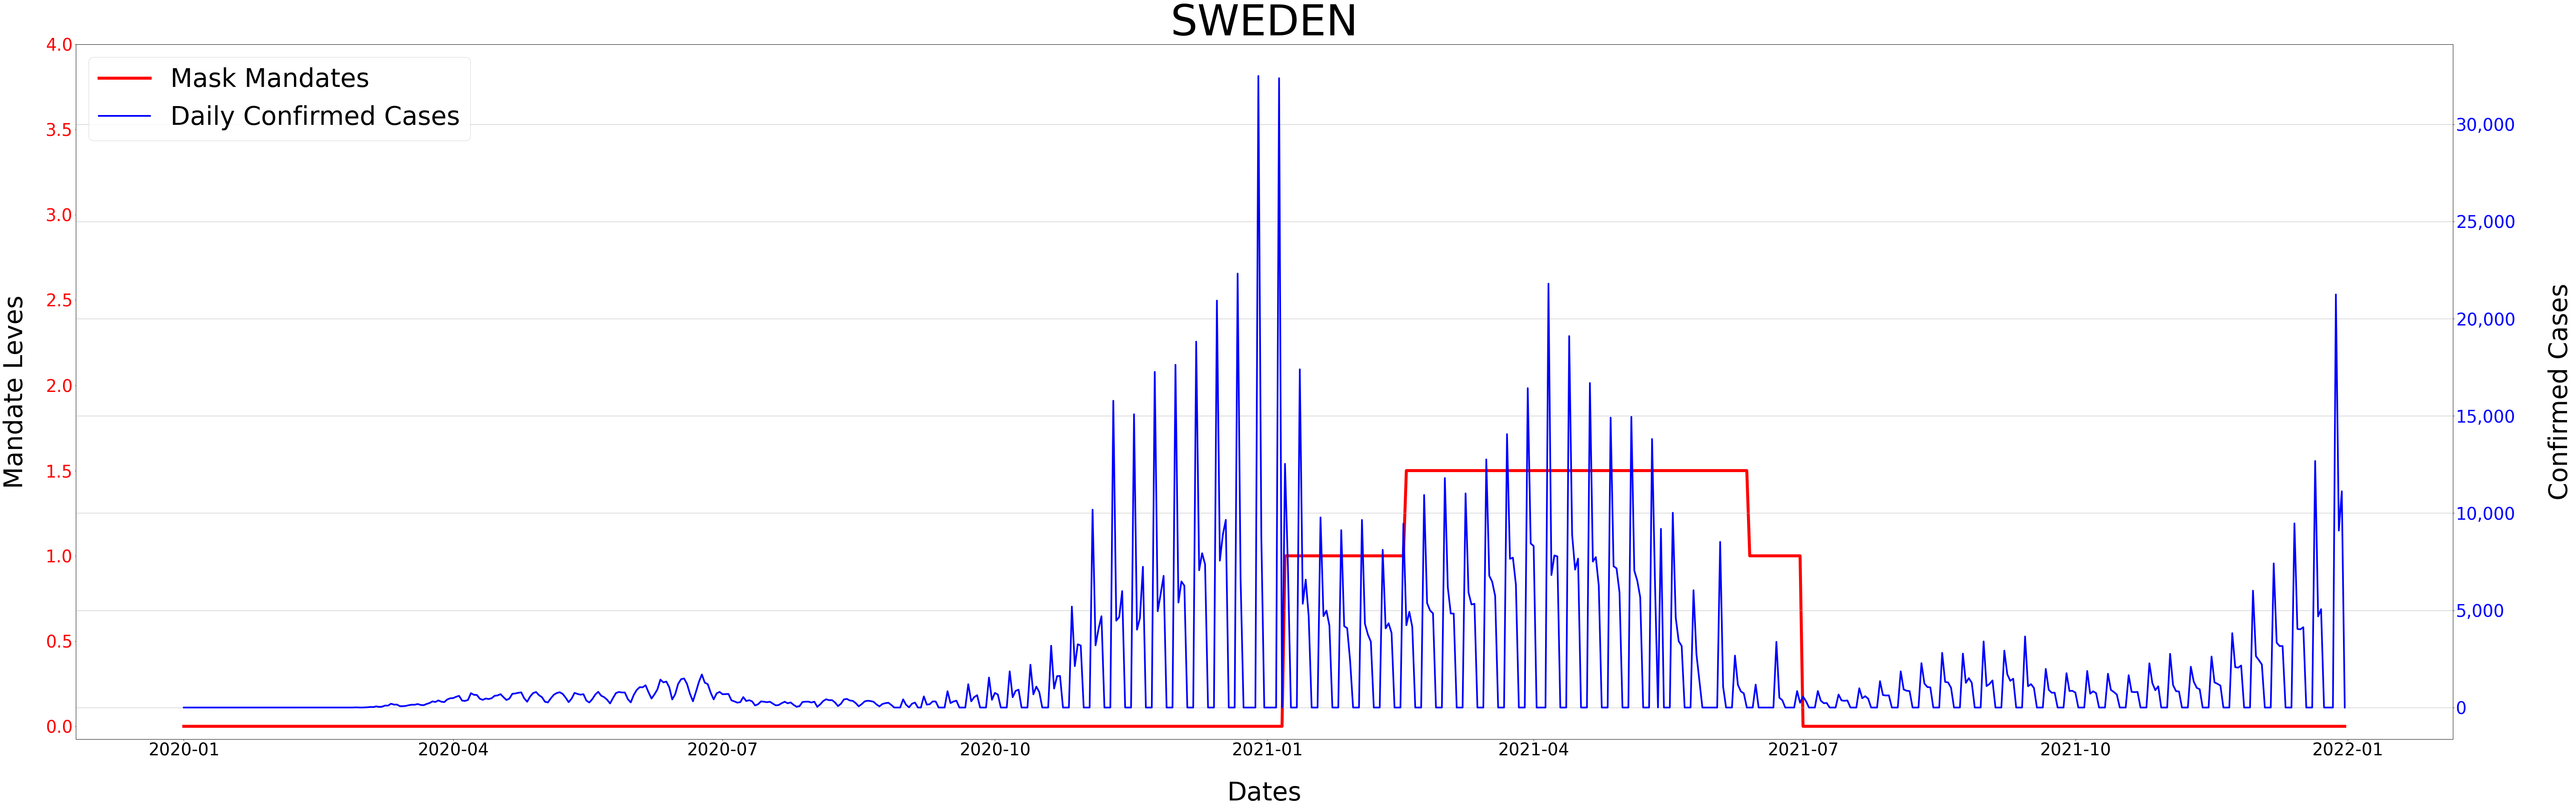

In [30]:
swe_df = data_six.loc[data_six['CountryName'].isin(['Sweden'])]
swe_df['daily_cases'] =swe_df['ConfirmedCases'].diff()
swe_df['daily_cases'] =swe_df['daily_cases'].fillna(0)

x1_swe = swe_df[['H6_combined_numeric']]
x2_swe = swe_df[['daily_cases']]
dates_swe = swe_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_swe,x1_swe,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('SWEDEN',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4)

ax2 =ax.twinx()
ax2.plot(dates_swe,x2_swe,linewidth=4,color="b",label='Daily Confirmed Cases')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',fontsize=60)
ax2.grid(True)
plt.savefig("Sweden.png")